# 자연어 처리

2025-07-21

# 1. 토크나이징

## 1) KoNLPy

* `pos()` : (토큰, 품사)의 쌍으로 출력
* `morphs()` : 토큰들만 출력
* `nouns()` : 명사들만 출력

In [171]:
from konlpy.tag import Okt

okt = Okt()

review = "분명 배달이 완료되었는데 나는 받지 않았엌ㅋㅋ"
result = okt.pos(review)    # pos, morphs, nouns

# for res in result :
#     print(res)

print(okt.pos(review))
print(okt.pos(review, stem=True))
print(okt.pos(review, norm=True))
print(okt.morphs(review))
print(okt.nouns(review))

[('분명', 'Noun'), ('배달', 'Noun'), ('이', 'Josa'), ('완료', 'Noun'), ('되었는데', 'Verb'), ('나', 'Noun'), ('는', 'Josa'), ('받지', 'Verb'), ('않았엌', 'Noun'), ('ㅋㅋ', 'KoreanParticle')]
[('분명', 'Noun'), ('배달', 'Noun'), ('이', 'Josa'), ('완료', 'Noun'), ('되어다', 'Verb'), ('나', 'Noun'), ('는', 'Josa'), ('받다', 'Verb'), ('않았엌', 'Noun'), ('ㅋㅋ', 'KoreanParticle')]
[('분명', 'Noun'), ('배달', 'Noun'), ('이', 'Josa'), ('완료', 'Noun'), ('되었는데', 'Verb'), ('나', 'Noun'), ('는', 'Josa'), ('받지', 'Verb'), ('않았어', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]
['분명', '배달', '이', '완료', '되었는데', '나', '는', '받지', '않았엌', 'ㅋㅋ']
['분명', '배달', '완료', '나', '않았엌']


## 2) Kiwi

In [176]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
review = "분명 배달이 완료되었는데 나는 받지 않았엌ㅋㅋㅋ"
results = kiwi.tokenize(review)

print(results)

for res in results :
    word = res.form
    pos = res.tag
    if pos[0] == "N" :
        print(word)
    # print(res.form, res.tag)


[Token(form='분명', tag='MAG', start=0, len=2), Token(form='배달', tag='NNG', start=3, len=2), Token(form='이', tag='JKS', start=5, len=1), Token(form='완료', tag='NNG', start=7, len=2), Token(form='되', tag='XSV', start=9, len=1), Token(form='었', tag='EP', start=10, len=1), Token(form='는데', tag='EC', start=11, len=2), Token(form='나', tag='NP', start=14, len=1), Token(form='는', tag='JX', start=15, len=1), Token(form='받', tag='VV-R', start=17, len=1), Token(form='지', tag='EC', start=18, len=1), Token(form='않', tag='VX', start=20, len=1), Token(form='었', tag='EP', start=21, len=1), Token(form='어', tag='EF', start=22, len=1), Token(form='ᆿ', tag='Z_CODA', start=22, len=1), Token(form='ㅋㅋㅋ', tag='SW', start=23, len=3)]
배달
완료
나


# 2. 빈도 분석

* 목표 : 어떤 단어가 많이 등장하는가? 의미 있는 단어가 무엇일까?

## 1) 데이터 불러오기

In [188]:
import pandas as pd
data = pd.read_csv("data/appreply.csv", index_col=0).dropna().reset_index(drop=True)
data.head()

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3


In [189]:
data.to_csv("data/appreply2.csv")

In [193]:
# 저장한 데이터 다시 불러오기
data = pd.read_csv("data/appreply2.csv", index_col=0)
data.head()

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3


## 2) 데이터 전처리

In [194]:
from konlpy.tag import Okt

okt = Okt()

In [205]:
# 정규표현식으로 전처리하기
text = "오늘!!!!!!!!!!!!!!!!!!!!!! ㅇㅇ ㅏㅏㅛ hello Hello 010-1234-5678 기분좋아^^ ㅎㅇ"

import re
# re.sub(정규표현식, 대체식, text)
new_text = re.sub("[^ㄱ-ㅎ]", "", text)     # 한글 자음만 출력해주세요
new_text = re.sub("[^가-힣a-zA-Z\s]", "", text)
print(new_text)

오늘   hello Hello  기분좋아 


In [ ]:
# word_list라는 빈 리스트를 만든다
# 모든 리뷰들을 형태소 분석기에 넣는다
# 그 리뷰들 중에 Noun만 추출한다
# 그 토큰들을 word_list에 담는다
    # 조건 : 2글자 이상인 단어만 담는다
    # 조건 : 불용어(stopwords)가 아닌 단어들만 담는다

word_list = []
stopwords = ["배민", "민족"]

for i, review in enumerate(data["text"].tolist()) :
    # STEP1. 데이터 전처리 진행
    new_review = re.sub("[^a-zA-Z가-힣\s]", "", review)
    # STEP2. 형태소 분석
    result = okt.nouns(new_review)
    # STEP3. 조건에 맞는 단어 담기
    for word in result :
        if len(word) > 1 and word not in stopwords :
            word_list.append(word)
    ### 출력 메세지 ###
    # print(f"{i}번째 리뷰 : {review}")
print(word_list)


['배달', '주문', '리뷰', '자주', '참고', '편입', '한가지', '건의', '사항', '최신', '점순', '주문', '자하', '메뉴', '메뉴', '리뷰', '확인', '기능', '메뉴', '검색', '기능', '리뷰', '특정', '메뉴', '검색', '기능', '주문', '수가', '메뉴', '리뷰', '보기', '위해', '래그', '시간', '소요', '효율', '발생', '긍정', '검토', '주심', '주문', '과거', '목록', '검색', '기능', '분명', '가게', '기억', '찾기', '메뉴', '검색', '곱창', '치면', '과거', '곱창', '목록', '가게', '리뷰', '리뷰', '보기', '검색', '화면', '전체', '배달', '포장', '배달', '크롤', '아래', '크롤', '자꾸만', '왼쪽', '오른쪽', '전체', '포장', '정말', '검색', '배달', '포장', '마트', '하나', '선택', '좌우', '가끔', '크롤', '왼쪽', '전체', '가게', '배달', '정렬', '가게', '가장', '위로', '지역', '추가', '배달', '별도', '체크', '배달', '만원', '이상', '배달', '장난', '하나', '하나', '가격', '대별', '금액', '체크', '배달', '별도', '확인', '최근', '업데이트', '안드로이드', '사양', '정도', '어플', '실행', '업데이트', '하라', '업데이트', '업데이트', '진행', '열기', '열기', '업데이트', '무한', '반복', '삭제', '설치', '환경설정', '증상', '다른', '증상', '이번', '업데이트', '관련', '파일', '확인', '참고', '사양', '핸드폰', '사양', '문제', '이번', '업데이트', '매장', '구분', '대체', '언제', '이면', '개선', '독점', '해이', '건가', '결제', '관련', '부분', '정말', '별로', '구성', '정말', '페이'

## 3) 워드클라우드

In [211]:
print(word_list)

['배달', '주문', '리뷰', '자주', '참고', '편입', '한가지', '건의', '사항', '최신', '점순', '주문', '자하', '메뉴', '메뉴', '리뷰', '확인', '기능', '메뉴', '검색', '기능', '리뷰', '특정', '메뉴', '검색', '기능', '주문', '수가', '메뉴', '리뷰', '보기', '위해', '래그', '시간', '소요', '효율', '발생', '긍정', '검토', '주심', '주문', '과거', '목록', '검색', '기능', '분명', '가게', '기억', '찾기', '메뉴', '검색', '곱창', '치면', '과거', '곱창', '목록', '가게', '리뷰', '리뷰', '보기', '검색', '화면', '전체', '배달', '포장', '배달', '크롤', '아래', '크롤', '자꾸만', '왼쪽', '오른쪽', '전체', '포장', '정말', '검색', '배달', '포장', '마트', '하나', '선택', '좌우', '가끔', '크롤', '왼쪽', '전체', '가게', '배달', '정렬', '가게', '가장', '위로', '지역', '추가', '배달', '별도', '체크', '배달', '만원', '이상', '배달', '장난', '하나', '하나', '가격', '대별', '금액', '체크', '배달', '별도', '확인', '최근', '업데이트', '안드로이드', '사양', '정도', '어플', '실행', '업데이트', '하라', '업데이트', '업데이트', '진행', '열기', '열기', '업데이트', '무한', '반복', '삭제', '설치', '환경설정', '증상', '다른', '증상', '이번', '업데이트', '관련', '파일', '확인', '참고', '사양', '핸드폰', '사양', '문제', '이번', '업데이트', '매장', '구분', '대체', '언제', '이면', '개선', '독점', '해이', '건가', '결제', '관련', '부분', '정말', '별로', '구성', '정말', '페이'

In [ ]:
# 키:값 => 단어:빈도 수
from collections import Counter

counter = Counter(word_list)
print(counter)
print(counter.most_common(30))

Counter({'배달': 601, '주문': 237, '가게': 215, '메뉴': 142, '시간': 124, '기능': 109, '고객': 107, '리뷰': 105, '사용': 101, '취소': 99, '음식': 99, '결제': 95, '어플': 92, '전화': 79, '검색': 77, '센터': 77, '다른': 71, '업데이트': 68, '이용': 67, '연결': 66, '쿠폰': 66, '계속': 61, '문제': 57, '다시': 55, '그냥': 55, '선택': 50, '진짜': 50, '생각': 49, '상담': 49, '하나': 47, '화면': 46, '확인': 46, '추가': 45, '요청': 43, '개선': 43, '매장': 42, '설정': 41, '기본': 39, '경우': 39, '식당': 38, '사항': 37, '사람': 37, '배차': 36, '삭제': 34, '라이더': 34, '서비스': 34, '포장': 33, '채팅': 33, '사진': 33, '기사': 32, '정말': 31, '지연': 31, '연락': 31, '알뜰': 30, '시스템': 30, '직접': 29, '할인': 29, '지도': 29, '버튼': 28, '문의': 28, '처음': 28, '음식점': 28, '사용자': 27, '정도': 26, '한번': 26, '자체': 26, '해도': 26, '이상': 26, '별로': 26, '위치': 25, '목록': 25, '무슨': 24, '부분': 24, '이유': 24, '바로': 24, '로그인': 24, '입력': 24, '때문': 23, '항상': 23, '자주': 23, '답변': 23, '이제': 23, '광고': 23, '혜택': 23, '이번': 23, '보고': 23, '가지': 22, '주소': 22, '전체': 21, '이해': 21, '표시': 21, '사장': 21, '운영': 21, '오류': 21, '정보': 20, '카드': 20, '장바구니': 20, '체

In [ ]:
# (한번 해보기) Counter 없이 딕셔너리로 코딩해보기


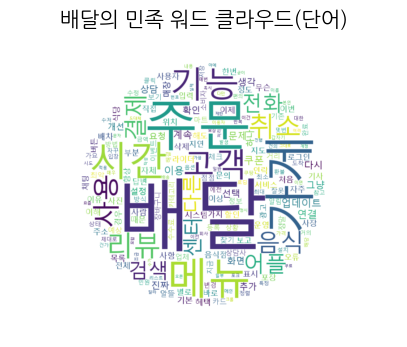

In [232]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

## (한번 해보기) Mask로 내가 원하는 모양으로 만들어보기
from PIL import Image
import numpy as np

mask_img = np.array(Image.open("resources/circle.png"))

wc = WordCloud(
    font_path = "C:\Windows\Fonts\malgun.ttf",
    mask=mask_img,
    background_color="white",
    width=800,
    height=400
)

wc.generate_from_frequencies(counter)

plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(단어)", fontsize =15)
plt.show()

[('배달', 941), ('주문', 543), ('가게', 373), ('리뷰', 352), ('메뉴', 341), ('사용', 282), ('결제', 243), ('기능', 234), ('어플', 223), ('검색', 197), ('음식', 193), ('시간', 189), ('업데이트', 178), ('쿠폰', 176), ('다시', 168), ('취소', 156), ('확인', 139), ('고객', 127), ('화면', 126), ('전화', 124), ('개선', 121), ('다른', 115), ('로그인', 115), ('계속', 113), ('이용', 109), ('추가', 108), ('문제', 103), ('생각', 102), ('선택', 100), ('사람', 94), ('경우', 91), ('진짜', 91), ('오류', 89), ('정말', 86), ('그냥', 84), ('설정', 83), ('하나', 82), ('삭제', 78), ('매장', 78), ('사항', 76), ('요청', 73), ('이벤트', 72), ('기사', 71), ('인증', 70), ('별로', 69), ('바로', 69), ('사진', 68), ('입력', 66), ('시스템', 66), ('포장', 64)]


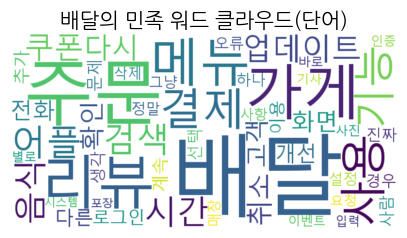

In [226]:
## (한번 해보기) 가장 많이 발생한 50개만 워드 클라우드로 그려보기
counter50 = Counter(word_list)
print(counter50.most_common(50))

wc50 = WordCloud(
    font_path = "C:\Windows\Fonts\malgun.ttf",
    background_color="white",
    width=800,
    height=400
)

# wc50.generate_from_frequencies(counter50.most_common(50))  -> most_common() 쓰면 list 형태로 나오기 때문에 에러남 (dict 형태가 되어야함)
wc50.generate_from_frequencies(dict(counter50.most_common(50)))

plt.figure(figsize=(5,5))
plt.imshow(wc50, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(단어)", fontsize =15)
plt.show()

## 4) 리뷰 검색

In [227]:
data.head()

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3


In [228]:
keyword = "결제"

# 조건 : data의 text열에서 keyword가 속해있어야 한다
extract_data = data.loc[data["text"].str.contains(keyword), :]
extract_data

,text,score
5,찜매장 구분 좀 해주세요! 대체 언제쯤이면 개선될까요?? 독점이라 해이한건가요? 유...,2
6,"앱 실행시에 로그인 여부를 먼저 물어보고 비회원 이용을 선택할 경우, 혹은 나중에 ...",5
11,"결제 수단에 현장 결제 아예 없애버렸네요,. 코로나 때문에 비대면 권장하는건 알겠지...",4
20,"비회원으로 주문하고 kb pay로 결제해서 ""결제가 완료되었습니다"" 라고 됐는데 (...",1
23,결제취소가 너무 어렵습니다. 가게에 전화하니 본인들도 취소할 수 없다며 제가 배민에...,1
...,...,...
982,결제전에 다른 음식을 시키려고 뒤로가기 눌렀는데 결제 완료됩니다. 그리고 1.5초도...,1
983,바로 결제가 안되어서 리뷰를 못적었습니다. 중국집 같은경우 대게 짬뽕 짜장만 셋트가...,1
987,잘 사용하고잇습니다~ 놀러가서도 사용할수잇어서 편하구요ㅎㅎ 다만..제가 친구네서 시...,4
993,제가 배민어플 거의 매달 vip 실적 오를만큼 엄청 이용하는데요 주문시키면 매장 전...,1


In [230]:
for i, review in enumerate(extract_data["text"]) :
    print(f"{i}번째 리뷰 : {review}")
    print("=" * 55)

0번째 리뷰 : 찜매장 구분 좀 해주세요! 대체 언제쯤이면 개선될까요?? 독점이라 해이한건가요? 유명한 앱 치고 결제 관련 부분도 정말 별로고, 앱 구성이 정말 단순합니다. 배민페이 사용절차가 힘들어 안쓰고 있구요. 다른것보다도 찜해놓은 매장들 한식, 양식, 중식, 카페.. 업종별로라도 구분 좀 시켜주세요. ㄱㄴㄷ순으로도 안되어 있고... 찜매장이 한두개도 아닌데, 이름을 전부 외울수도 없고... 매번 찾기가 어려워서 재검색하거나 주문했던 목록에서 찾고 들어갑니다.
1번째 리뷰 : 앱 실행시에 로그인 여부를 먼저 물어보고 비회원 이용을 선택할 경우, 혹은 나중에 입력 선택 후 주문 결제 시 받을 주소를 설정하는 것으로 순서를 변경하면 어떨까요? 저는 필요할 때만 어플을 설치해서 삭제, 설치를 자주 하는 편인데요! 다시 사용하려고 재설치하고 실행하면 회원정보에 주소 저장을 해놨음에도 어플 실행하면 로그인 여부 안 물어보고 주소를 다시 설정해야해서 불편해요 ㅜ.. 처음에 주소를 설정해도 주문할 때 어차피 로그인할 건데 시간이 매번 추가로 드네요 저같이 어플을 사용하는 사람이 많지는 않겠지만 혹시 굳이 주문도 하지 않은 상태에서 주소부터 설정하는 이유가 따로 있을까요? 수정하기 어려운 사항이라면 제가 그냥 어플을 삭제하지 않고 사용하겠지만 순서를 바꾸는 정도라면 어렵지 않을 거 같고 사용자로서 굳이 주소부터 설정할 필요가 없을 거 같아서 의견 남겨봅니다! 어떨까요!
2번째 리뷰 : 결제 수단에 현장 결제 아예 없애버렸네요,. 코로나 때문에 비대면 권장하는건 알겠지만 이제 마스크 착용 필수화도 사라지는 추세인데 왜 없앤건지... +배민1에만 제한된 거였군요ㅠ 예전부터 그랬는지 모르겠는데 암튼 배민1은 현장 결제가 안돼서 조금 아쉽네요.. 그래도 배달 어플 중에 가장 잘 사용하고 있습니다
3번째 리뷰 : 비회원으로 주문하고 kb pay로 결제해서 "결제가 완료되었습니다" 라고 됐는데 (처음이라 잘 몰라서 2번 반복해서 결제) 확인차 매장에 전화하니 결제가 안됐다고, 배

# 3. 긍부정 분석

## 1) 데이터 불러오기

In [233]:
import pandas as pd
data = pd.read_csv("data/appreply2.csv", index_col=0)
data

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3
...,...,...
995,갑자기 로그아웃 되더니 비밀번호 변경 실패 메세지가 계속 뜨네요. 휴대폰 번호로 인...,1
996,기사님이 상품 픽업을 하셨는지 표시되면 더 좋을 것 같습니다. 가게에서 조리가 늦게...,3
997,요즘 요기요 보다 배민을 많이 쓰는 사람입니다 전화보다 앱을 써서 좀더 간편하고 다...,3
998,취소 됐으면 적어도 전화 주는 제도는 있어야하는거 아닌가요? 주문해놓고 다른거 하는...,1


In [236]:
# (미션) reaction열을 만드는데, score가 4이상이면 긍정(1), 그 외는 부정(0)으로 나타내주세요
data["reaction"] = np.where(data["score"] >= 4, 1, 0)
data.head()

,text,score,reaction
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4,1
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5,1
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1,0
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2,0
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3,0


In [241]:
data.to_csv("data/appreply3.csv")

In [ ]:
import pandas as pd



## 2) 데이터 탐색

In [237]:
# 긍부정 비율이 어떻게 되나요?
data["reaction"].value_counts()

reaction
0    729
1    271
Name: count, dtype: int64

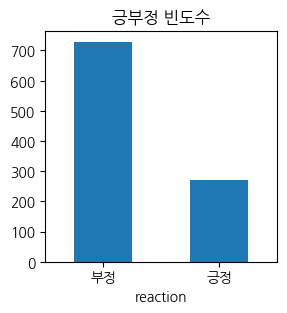

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

plt.figure(figsize=(3,3))
data["reaction"].value_counts().plot(kind="bar")
plt.title("긍부정 빈도수")
plt.xticks(ticks=[0,1], labels=["부정", "긍정"], rotation=0)    # rotation : 글자 돌리기
plt.show()

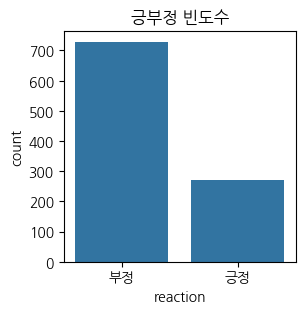

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(data=data, x="reaction")
plt.title("긍부정 빈도수")
plt.xticks(ticks=[0,1], labels=["부정", "긍정"])    # 원래 글자가 똑바로 나오기 때문에 rotation 할필요 없음
plt.show()

In [249]:
# reaction == 1 인 데이터 data_pos
# reaction == 0 인 데이터 data_neg
data_pos = data.loc[data["reaction"] == 1, :]
print(data_pos.shape)
data_neg = data.loc[data["reaction"] == 0, :]
print(data_neg.shape)

(271, 3)
(729, 3)


## 3) 데이터 전처리

In [254]:
def get_word_list(data, stopwords) :
    """리뷰 데이터프레임과 불용어 리스트를 입력하면 word_list를 반환해주는 함수"""
    word_list = []

    for i, review in enumerate(data["text"].tolist()) :
        # STEP1. 데이터 전처리 진행
        new_review = re.sub("[^a-zA-Z가-힣\s]", "", review)
        # STEP2. 형태소 분석
        result = okt.nouns(new_review)
        # STEP3. 조건에 맞는 단어 담기
        for word in result :
            if len(word) > 1 and word not in stopwords :
                word_list.append(word)
        ### 출력 메세지 ###
        # print(f"{i}번째 리뷰 : {review}")
    return word_list

In [255]:
stopwords = ["배민", "민족"]

word_list_pos = get_word_list(data_pos, stopwords)
word_list_neg = get_word_list(data_neg, stopwords)

In [256]:
print(word_list_pos)
print(word_list_neg)

['배달', '주문', '리뷰', '자주', '참고', '편입', '한가지', '건의', '사항', '최신', '점순', '주문', '자하', '메뉴', '메뉴', '리뷰', '확인', '기능', '메뉴', '검색', '기능', '리뷰', '특정', '메뉴', '검색', '기능', '주문', '수가', '메뉴', '리뷰', '보기', '위해', '래그', '시간', '소요', '효율', '발생', '긍정', '검토', '주심', '주문', '과거', '목록', '검색', '기능', '분명', '가게', '기억', '찾기', '메뉴', '검색', '곱창', '치면', '과거', '곱창', '목록', '가게', '리뷰', '리뷰', '보기', '실행', '로그인', '여부', '먼저', '비회', '이용', '선택', '경우', '나중', '입력', '선택', '주문', '결제', '주소', '설정', '순서', '변경', '어플', '설치', '삭제', '설치', '자주', '다시', '사용', '설치', '실행', '회원정보', '주소', '저장', '어플', '실행', '로그인', '여부', '주소', '다시', '설정', '처음', '주소', '설정', '주문', '어차피', '로그', '시간', '매번', '추가', '드네', '어플', '사용', '사람', '혹시', '굳이', '주문', '상태', '주소', '설정', '이유', '수정', '사항', '라면', '그냥', '어플', '삭제', '사용', '순서', '정도', '라면', '사용자', '로서', '굳이', '주소', '설정', '필요', '의견', '이용', '사용자', '가지', '건의', '사항', '리뷰', '대신', '방문', '표시', '방문', '표시', '생각', '혹시', '건의', '사항', '다시', '정말', '정말', '결제', '수단', '현장', '결제', '아예', '코로나', '때문', '비대', '권장', '이제', '마스크', '착용', '필수', '추세',

## 4) 워드클라우드

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib
from PIL import Image
import numpy as np

def draw_wordcloud(word_list) :
    """word_list를 받으면 Counter 함수로 빈도수를 센 후 워드클라우드를 그리고, counter를 반환하는 함수"""
    counter = Counter(word_list)
    
    image = Image.open("resources/circle.png")
    mask_img = np.array(image)

    wc = WordCloud(
        font_path = "C:\Windows\Fonts\malgun.ttf",
        mask=mask_img,
        background_color="white",
        width=800,
        height=400
    )

    wc.generate_from_frequencies(counter)

    plt.figure(figsize=(5,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("배달의 민족 워드 클라우드(단어)", fontsize =15)
    plt.show()

    return counter

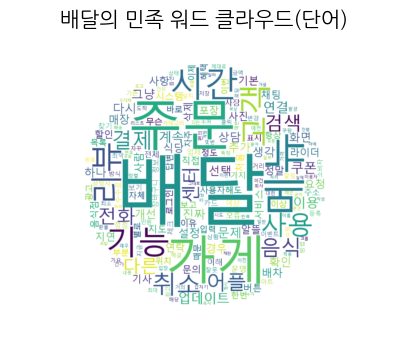

Counter({'배달': 601, '주문': 237, '가게': 215, '메뉴': 142, '시간': 124, '기능': 109, '고객': 107, '리뷰': 105, '사용': 101, '취소': 99, '음식': 99, '결제': 95, '어플': 92, '전화': 79, '검색': 77, '센터': 77, '다른': 71, '업데이트': 68, '이용': 67, '연결': 66, '쿠폰': 66, '계속': 61, '문제': 57, '다시': 55, '그냥': 55, '선택': 50, '진짜': 50, '생각': 49, '상담': 49, '하나': 47, '화면': 46, '확인': 46, '추가': 45, '요청': 43, '개선': 43, '매장': 42, '설정': 41, '기본': 39, '경우': 39, '식당': 38, '사항': 37, '사람': 37, '배차': 36, '삭제': 34, '라이더': 34, '서비스': 34, '포장': 33, '채팅': 33, '사진': 33, '기사': 32, '정말': 31, '지연': 31, '연락': 31, '알뜰': 30, '시스템': 30, '직접': 29, '할인': 29, '지도': 29, '버튼': 28, '문의': 28, '처음': 28, '음식점': 28, '사용자': 27, '정도': 26, '한번': 26, '자체': 26, '해도': 26, '이상': 26, '별로': 26, '위치': 25, '목록': 25, '무슨': 24, '부분': 24, '이유': 24, '바로': 24, '로그인': 24, '입력': 24, '때문': 23, '항상': 23, '자주': 23, '답변': 23, '이제': 23, '광고': 23, '혜택': 23, '이번': 23, '보고': 23, '가지': 22, '주소': 22, '전체': 21, '이해': 21, '표시': 21, '사장': 21, '운영': 21, '오류': 21, '정보': 20, '카드': 20, '장바구니': 20, '체

In [259]:
result = draw_wordcloud(word_list_pos)
print(result)

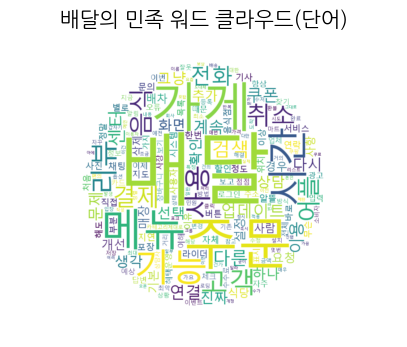

Counter({'배달': 601, '주문': 237, '가게': 215, '메뉴': 142, '시간': 124, '기능': 109, '고객': 107, '리뷰': 105, '사용': 101, '취소': 99, '음식': 99, '결제': 95, '어플': 92, '전화': 79, '검색': 77, '센터': 77, '다른': 71, '업데이트': 68, '이용': 67, '연결': 66, '쿠폰': 66, '계속': 61, '문제': 57, '다시': 55, '그냥': 55, '선택': 50, '진짜': 50, '생각': 49, '상담': 49, '하나': 47, '화면': 46, '확인': 46, '추가': 45, '요청': 43, '개선': 43, '매장': 42, '설정': 41, '기본': 39, '경우': 39, '식당': 38, '사항': 37, '사람': 37, '배차': 36, '삭제': 34, '라이더': 34, '서비스': 34, '포장': 33, '채팅': 33, '사진': 33, '기사': 32, '정말': 31, '지연': 31, '연락': 31, '알뜰': 30, '시스템': 30, '직접': 29, '할인': 29, '지도': 29, '버튼': 28, '문의': 28, '처음': 28, '음식점': 28, '사용자': 27, '정도': 26, '한번': 26, '자체': 26, '해도': 26, '이상': 26, '별로': 26, '위치': 25, '목록': 25, '무슨': 24, '부분': 24, '이유': 24, '바로': 24, '로그인': 24, '입력': 24, '때문': 23, '항상': 23, '자주': 23, '답변': 23, '이제': 23, '광고': 23, '혜택': 23, '이번': 23, '보고': 23, '가지': 22, '주소': 22, '전체': 21, '이해': 21, '표시': 21, '사장': 21, '운영': 21, '오류': 21, '정보': 20, '카드': 20, '장바구니': 20, '체

In [260]:
result = draw_wordcloud(word_list_neg)
print(result)

### + 함수 응용(most_common 반영하기)

In [280]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib
from PIL import Image
import numpy as np

def draw_wordcloud(word_list, top_n = None) :
    """word_list를 받으면 Counter 함수로 빈도수를 센 후 워드클라우드를 그리고, counter를 반환하는 함수"""
    counter = Counter(word_list)
    
    if top_n is not None :
        counter = dict(counter.most_common(top_n))

    image = Image.open("resources/circle.png")
    mask_img = np.array(image)

    wc = WordCloud(
        font_path = "C:\Windows\Fonts\malgun.ttf",
        mask=mask_img,
        background_color="white",
        width=800,
        height=400
    )

    wc.generate_from_frequencies(counter)

    plt.figure(figsize=(5,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("배달의 민족 워드 클라우드(단어)", fontsize =15)
    plt.show()

    return counter

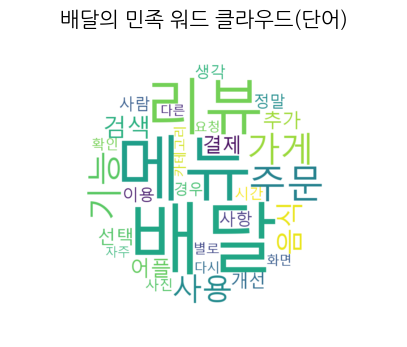

{'배달': 232, '메뉴': 188, '리뷰': 179, '주문': 147, '기능': 127, '가게': 127, '사용': 112, '음식': 91, '검색': 88, '어플': 64, '결제': 58, '추가': 53, '선택': 49, '개선': 46, '사항': 42, '이용': 39, '사람': 38, '정말': 38, '생각': 37, '경우': 33, '시간': 32, '사진': 31, '확인': 28, '별로': 28, '다시': 27, '카테고리': 27, '요청': 27, '화면': 25, '다른': 25, '자주': 24}


In [281]:
result = draw_wordcloud(word_list_pos, top_n=30)
print(result)

# 4. 장바구니 분석

## 1) 데이터 불러오기

In [265]:
data = pd.read_csv("data/appreply2.csv", index_col=0)
data.head()

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3


## 2) 데이터 전처리

In [ ]:
# word_list = [리뷰1 단어1, 리뷰1 단어2, 리뷰2 단어1, 리뷰2 단어2, 리뷰2 단어3, ...]

In [ ]:
# main_list = [[리뷰1 단어1 리뷰1 단어2], [리뷰2 단어1, 리뷰2 단어2, 리뷰3 단어3], ...]

In [266]:
main_list = []
stopwords = ["배민", "민족"]

for i, review in enumerate(data["text"].tolist()) :
    # STEP1. 데이터 전처리 진행
    new_review = re.sub("[^a-zA-Z가-힣\s]", "", review)
    # STEP2. 형태소 분석
    result = okt.nouns(new_review)
    # STEP3. 조건에 맞는 단어 담기
    sub_list = []
    for word in result :
        if len(word) > 1 and word not in stopwords :
            sub_list.append(word)
    main_list.append(sub_list)

    ### 출력 메세지 ###
    print(f"{i}번째 리뷰 : {review}")
print(main_list)

0번째 리뷰 : 배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,별점순 뿐만아니라 제가 주문하고자하는 메뉴를 특정해서 그 메뉴의 리뷰만 확인할 수 있는 기능이 있으면 좋을 것 같습니다. 메뉴검색 기능처럼 리뷰에서도 특정 메뉴 검색기능이 필요합니다. 주문수가 많지않은 메뉴의 리뷰를 보기 위해서 드래그하느라 시간이 많이 소요되는 비효율이 발생합니다. 긍정적으로 검토해주심 좋을 것 같습니다.
1번째 리뷰 : 내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 기억은 있는데 뭘시켰고 맛있게 먹은게 맞는지 알고싶은데 찾기가 너무 어렵네요.. 먹던 메뉴도 검색가능했으면 좋겠어요! 예를 들면 곱창 을 치면 과거에 시킨 곱창목록이 뜨거나 혹은 가게 리뷰창에 내리뷰보기 가 있어도 좋을거같아요 :)
2번째 리뷰 : 검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스크롤하는데 자꾸만 왼쪽 오른쪽으로 넘어가서 전체 탭이나 포장 탭을 보게 되는데 정말 불편합니다. 검색 후 배달 탭, 포장 탭, B마트 탭 뭐든 하나를 선택했으면 좌우로 넘기는 건 안 되게 하시면 안되나요? 가끔 그러는 것도 아니고 스크롤 한 번 내릴 때마다 왼쪽으로 넘어가서 전체 탭에 가게 되니까 너무 불편하고 답답해서 씁니다
3번째 리뷰 : 배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니다. 그리고 지역에 따라 추가 배달료가 있다고 별도로 체크하게 되어있어서 결국 배달팁은 5000원이 넘습니다. 10만원 이상 시키면 배달팁 0원이라는데 장난하는 것도 아니고.... 결국 하나하나 눌러가면서 가격대별 금액을 체크하고 배달팁 별도로 받는지도 확인해야합니다.
4번째 리뷰 : 최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 업데이트 하라고 나오고 업데이트 누르면 업데이트 진행은 안되고 열기 나오고 열기 누르면 업데이트 나오고 무한반복.. 수없이 삭제와 재설치 환

In [267]:
print(main_list)

[['배달', '주문', '리뷰', '자주', '참고', '편입', '한가지', '건의', '사항', '최신', '점순', '주문', '자하', '메뉴', '메뉴', '리뷰', '확인', '기능', '메뉴', '검색', '기능', '리뷰', '특정', '메뉴', '검색', '기능', '주문', '수가', '메뉴', '리뷰', '보기', '위해', '래그', '시간', '소요', '효율', '발생', '긍정', '검토', '주심'], ['주문', '과거', '목록', '검색', '기능', '분명', '가게', '기억', '찾기', '메뉴', '검색', '곱창', '치면', '과거', '곱창', '목록', '가게', '리뷰', '리뷰', '보기'], ['검색', '화면', '전체', '배달', '포장', '배달', '크롤', '아래', '크롤', '자꾸만', '왼쪽', '오른쪽', '전체', '포장', '정말', '검색', '배달', '포장', '마트', '하나', '선택', '좌우', '가끔', '크롤', '왼쪽', '전체', '가게'], ['배달', '정렬', '가게', '가장', '위로', '지역', '추가', '배달', '별도', '체크', '배달', '만원', '이상', '배달', '장난', '하나', '하나', '가격', '대별', '금액', '체크', '배달', '별도', '확인'], ['최근', '업데이트', '안드로이드', '사양', '정도', '어플', '실행', '업데이트', '하라', '업데이트', '업데이트', '진행', '열기', '열기', '업데이트', '무한', '반복', '삭제', '설치', '환경설정', '증상', '다른', '증상', '이번', '업데이트', '관련', '파일', '확인', '참고', '사양', '핸드폰', '사양', '문제', '이번', '업데이트'], ['매장', '구분', '대체', '언제', '이면', '개선', '독점', '해이', '건가', '결제', '관련', '부분', '정말', '별로', '구성',

## 3) 연관성 분석

```
uv add mlxtend
```

In [268]:
import pandas as pd 
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import apriori, association_rules 

te = TransactionEncoder()
te_arr = te.fit(main_list).transform(main_list)
df = pd.DataFrame(te_arr, columns=te.columns_)

df

,가게,가격,가계,가공,가관,가구,가기,가까스로,가까윤,가까이,...,휴대전화,휴대폰,휴대폰결제,휴먼,휴면,휴업,흐릿,희망,흰색,히어로
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
996,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [269]:
# 각 단어가 출현한 횟수
df.sum(axis=0)

가게     208
가격      29
가계       1
가공       1
가관       2
      ... 
휴업       1
흐릿       1
희망       1
흰색       1
히어로      1
Length: 2806, dtype: int64

In [ ]:
# apriori : 누가 자주 같이 출현하는가   (min_support : support가 0.05인 이상만)
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True, max_len=2)     #itemsets가 최대 2개까지만 나오게 (주문,어플)
frequent_itemsets

,support,itemsets
0,0.208,(가게)
1,0.102,(개선)
2,0.111,(검색)
3,0.116,(결제)
4,0.076,(경우)
...,...,...
74,0.062,"(주문, 시간)"
75,0.050,"(주문, 어플)"
76,0.057,"(주문, 음식)"
77,0.061,"(주문, 전화)"


* support: $P(A\cap B)$     : A와 B가 같이 발생할 확률
* confidence: $P(B|A)=\dfrac{P(A\cap B)}{P(A)}$      : A가 발생했을 때, B가 발생할 확률
* lift: $\dfrac{P(B|A)}{P(B)}$      : (lift 값이 1보다 크다면 B가 홀로 발생할 확률보다 A가 발생했을때 B가 발생할 확률이 높다는걸 의미)
* (A : antecedents / B : consequents)

In [271]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules[["antecedents", "consequents", "support", "confidence", "lift"]]

,antecedents,consequents,support,confidence,lift
0,(가게),(배달),0.109,0.524038,1.193709
1,(고객),(센터),0.050,0.543478,10.656436
2,(센터),(고객),0.050,0.980392,10.656436
3,(다른),(배달),0.055,0.539216,1.228282
4,(시간),(배달),0.074,0.606557,1.381680
5,(어플),(배달),0.079,0.526667,1.199696
6,(음식),(배달),0.085,0.625000,1.423690
7,(전화),(배달),0.050,0.561798,1.279722
8,(주문),(배달),0.156,0.501608,1.142614
9,(쿠폰),(배달),0.054,0.514286,1.171494


## 4) 시각화

In [ ]:
# (전화, 취소)=> "전화, 취소"   (주문, 배달)=> "주문, 배달"

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

rules["antecedents_str"] = rules["antecedents"].apply(lambda x: ",".join(sorted(list(x))))
rules["consequents_str"] = rules["consequents"].apply(lambda x: ",".join(sorted(list(x))))
rules[["antecedents", "consequents", "support", "confidence", "lift"]]

,antecedents,consequents,support,confidence,lift
0,(가게),(배달),0.109,0.524038,1.193709
1,(고객),(센터),0.050,0.543478,10.656436
2,(센터),(고객),0.050,0.980392,10.656436
3,(다른),(배달),0.055,0.539216,1.228282
4,(시간),(배달),0.074,0.606557,1.381680
5,(어플),(배달),0.079,0.526667,1.199696
6,(음식),(배달),0.085,0.625000,1.423690
7,(전화),(배달),0.050,0.561798,1.279722
8,(주문),(배달),0.156,0.501608,1.142614
9,(쿠폰),(배달),0.054,0.514286,1.171494


In [278]:
pivot_data = rules.pivot_table(
    index = "antecedents_str",
    columns = "consequents_str",
    values = "confidence",
    fill_value = 0
)
pivot_data

consequents_str,고객,배달,센터,주문
antecedents_str,,,,
가게,0.000000,0.524038,0.000000,0.000000
고객,0.000000,0.000000,0.543478,0.000000
다른,0.000000,0.539216,0.000000,0.000000
센터,0.980392,0.000000,0.000000,0.000000
시간,0.000000,0.606557,0.000000,0.508197
어플,0.000000,0.526667,0.000000,0.000000
음식,0.000000,0.625000,0.000000,0.000000
전화,0.000000,0.561798,0.000000,0.685393
주문,0.000000,0.501608,0.000000,0.000000


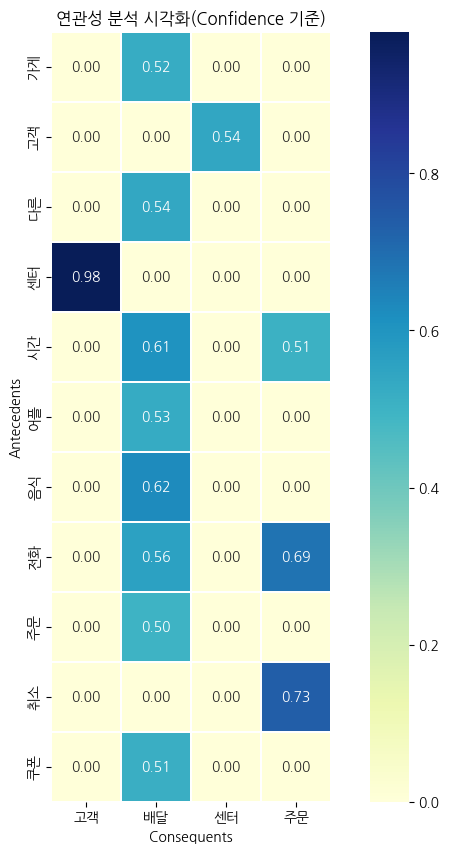

In [279]:
plt.figure(figsize=(10,10))
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.3, square=True)
plt.title("연관성 분석 시각화(Confidence 기준)")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.show()

# 5. 네트워크 분석

```
uv add networkx
```

In [291]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_str,consequents_str
0,(가게),(배달),0.208,0.439,0.109,0.524038,1.193709,1.0,0.017688,1.178667,0.204893,0.202602,0.151584,0.386165,가게,배달
1,(고객),(센터),0.092,0.051,0.050,0.543478,10.656436,1.0,0.045308,2.078762,0.997974,0.537634,0.518944,0.761935,고객,센터
2,(센터),(고객),0.051,0.092,0.050,0.980392,10.656436,1.0,0.045308,46.308000,0.954858,0.537634,0.978405,0.761935,센터,고객
3,(다른),(배달),0.102,0.439,0.055,0.539216,1.228282,1.0,0.010222,1.217489,0.206965,0.113169,0.178638,0.332250,다른,배달
4,(시간),(배달),0.122,0.439,0.074,0.606557,1.381680,1.0,0.020442,1.425875,0.314628,0.151951,0.298676,0.387561,시간,배달


In [292]:
import networkx as nx
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 1. 그래프 생성
G = nx.Graph()

# 2. 엣지 추가
for _, row in rules.iterrows() :
    # 단어 추출
    antecedent = ",".join(row["antecedents"])
    consequent = ",".join(row["consequents"])
    weight = row["lift"]

    # 노드 추가
    G.add_edge(antecedent, consequent, weight=weight)

In [287]:
for temp in rules.iterrows():
    print(temp)

(0, antecedents               (가게)
consequents               (배달)
antecedent support       0.208
consequent support       0.439
support                  0.109
confidence            0.524038
lift                  1.193709
representativity           1.0
leverage              0.017688
conviction            1.178667
zhangs_metric         0.204893
jaccard               0.202602
certainty             0.151584
kulczynski            0.386165
antecedents_str             가게
consequents_str             배달
Name: 0, dtype: object)
(1, antecedents                (고객)
consequents                (센터)
antecedent support        0.092
consequent support        0.051
support                    0.05
confidence             0.543478
lift                  10.656436
representativity            1.0
leverage               0.045308
conviction             2.078762
zhangs_metric          0.997974
jaccard                0.537634
certainty              0.518944
kulczynski             0.761935
antecedents_str         

In [288]:
G.edges()

EdgeView([('가게', '배달'), ('배달', '다른'), ('배달', '시간'), ('배달', '어플'), ('배달', '음식'), ('배달', '전화'), ('배달', '주문'), ('배달', '쿠폰'), ('고객', '센터'), ('시간', '주문'), ('전화', '주문'), ('주문', '취소')])

In [290]:
G["가게"]["배달"]

{'weight': 0.5240384615384616}

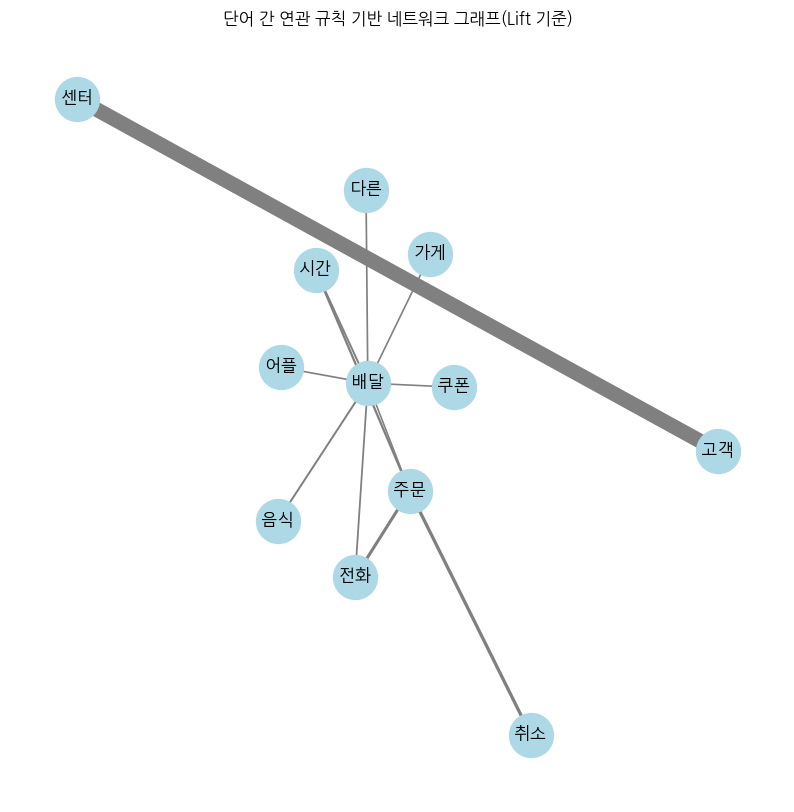

In [293]:
# 3. 노드 배치
pos = nx.kamada_kawai_layout(G)

# 4. 가중치 추출
edge_weights = [G[u][v]["weight"] for u, v in G.edges()]

# 5. 노드 스타일 지정 및 그리기
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=1000)
nx.draw_networkx_edges(G, pos, edge_color="gray", width=edge_weights)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="Malgun Gothic")

# edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("단어 간 연관 규칙 기반 네트워크 그래프(Lift 기준)")
plt.axis("off")
plt.show()

# 6. 인코딩/벡터라이징

- 인코딩 : 숫자 부여
- 벡터라이징 : 숫자에 의미 부여

```
uv add scikit-learn
```

## 1) 인코딩

In [294]:
sentences = [
    "나는 오늘 기분이 좋다",
    "오늘 날씨가 좋다",
    "나는 기분이 나쁘다"
]

### 정수 인코딩

In [296]:
# sentences를 스페이스 기준으로 쪼갠다
# 그 단어들의 집합을 만든다
tokens = []

for sent in sentences :
    temp = sent.split()
    tokens.extend(temp)

print(tokens)
token_set = set(tokens)
print(token_set)

['나는', '오늘', '기분이', '좋다', '오늘', '날씨가', '좋다', '나는', '기분이', '나쁘다']
{'나는', '기분이', '오늘', '나쁘다', '좋다', '날씨가'}


In [ ]:
from sklearn.preprocessing import LabelEncoder

print(f"입력값 : {list(token_set)}")
label_encoder = LabelEncoder()
encoded = label_encoder.fit_transform(list(token_set))
print(f"출력값 : {encoded}")
print(f"어떤 기준인가요? {label_encoder.classes_}")

입력값 : ['나는', '기분이', '오늘', '나쁘다', '좋다', '날씨가']
출력값 : [1 0 4 2 5 3]
어떤 기준인가요? ['기분이' '나는' '나쁘다' '날씨가' '오늘' '좋다']


In [301]:
mydict = {}
for i, key in enumerate(label_encoder.classes_) :
    mydict[str(key)] = i
print(mydict)

{'기분이': 0, '나는': 1, '나쁘다': 2, '날씨가': 3, '오늘': 4, '좋다': 5}


In [304]:
label_encoder.transform(["나는", "기분이", "나쁘다"])

array([1, 0, 2])

### 원-핫 인코딩(OneHotEncoder)

In [307]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

tokens_numpy = np.array(list(token_set))
print(tokens_numpy)
print("="*50)

tokens_arr = tokens_numpy.reshape(-1, 1)
print(f"입력값:\n{tokens_arr}")
print("="*50)

oh_encoder = OneHotEncoder()
encoded = oh_encoder.fit_transform(tokens_arr)
print(f"출력값:\n{encoded.toarray()}")
print(f"어떤 기준인가요? {oh_encoder.categories_}")

['나는' '기분이' '오늘' '나쁘다' '좋다' '날씨가']
입력값:
[['나는']
 ['기분이']
 ['오늘']
 ['나쁘다']
 ['좋다']
 ['날씨가']]
출력값:
[[0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]]
어떤 기준인가요? [array(['기분이', '나는', '나쁘다', '날씨가', '오늘', '좋다'], dtype='<U3')]


## 2) 벡터라이징

### BoW(Bag of Words, CountVectorizer)

In [316]:
sentences = [
    "나는 오늘 기분이 좋다",
    "오늘 날씨가 좋다",
    "나는 기분이 나쁘다",
    "집에 가고 싶다"
]

In [313]:
# 미션 : 딕셔너리 만들기(단어 : 빈도, 형태의 딕셔너리 만들기)
mydict = {}
for sent in sentences :
    # print(sent.split())
    # 만약에 word가 mydict 키에 있으면 +1을 하고, 아니면 word를 키로 만들어 값을 1로 만든다
    for word in sent.split() :
        if word in mydict :
            mydict[word] += 1
        else :
            mydict[word] = 1
    print(mydict)

{'나는': 1, '오늘': 1, '기분이': 1, '좋다': 1}
{'나는': 1, '오늘': 2, '기분이': 1, '좋다': 2, '날씨가': 1}
{'나는': 2, '오늘': 2, '기분이': 2, '좋다': 2, '날씨가': 1, '나쁘다': 1}


In [309]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(sentences)
print(vectorizer.vocabulary_)
print(bow_matrix.toarray())

{'나는': 1, '오늘': 4, '기분이': 0, '좋다': 5, '날씨가': 3, '나쁘다': 2}
[[1 1 0 0 1 1]
 [0 0 0 1 1 1]
 [1 1 1 0 0 0]]


### TF-IDF

In [319]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentences)
print(vectorizer.vocabulary_)
print(tfidf_matrix.toarray())

{'나는': 2, '오늘': 6, '기분이': 1, '좋다': 7, '날씨가': 4, '나쁘다': 3, '집에': 8, '가고': 0, '싶다': 5}
[[0.         0.5        0.5        0.         0.         0.
  0.5        0.5        0.        ]
 [0.         0.         0.         0.         0.66767854 0.
  0.52640543 0.52640543 0.        ]
 [0.         0.52640543 0.52640543 0.66767854 0.         0.
  0.         0.         0.        ]
 [0.57735027 0.         0.         0.         0.         0.57735027
  0.         0.         0.57735027]]


### 유사도 분석

In [320]:
print(sentences)

['나는 오늘 기분이 좋다', '오늘 날씨가 좋다', '나는 기분이 나쁘다', '집에 가고 싶다']


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(tfidf_matrix)
print(similarity)

# 왜 하는가?
# 데이터 프레임을 숫자로 바꾸고 유사도로 나타내는건 -> 추천시스템...

[[1.         0.52640543 0.52640543 0.        ]
 [0.52640543 1.         0.         0.        ]
 [0.52640543 0.         1.         0.        ]
 [0.         0.         0.         1.        ]]


----------------------------------------------------------------------------

2025-07-18

# 1. 토크나이징

In [ ]:
# 테스트 코드
from konlpy.tag import Kkma
from konlpy.utils import pprint

kkma = Kkma()
pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))

['네, 안녕하세요.', '반갑습니다.']


In [ ]:
from konlpy.tag import Okt  # Okt, Kkma

okt = Okt()
kkma = Kkma()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
result = okt.pos(text)
result2 = kkma.pos(text)

for res in result :
    print(res)

print("="*33)

for res in result2 :
    print(res)

# print(result)
# print(result2)

('분명', 'Noun')
('배달', 'Noun')
('이', 'Josa')
('완료', 'Noun')
('되었는데', 'Verb')
('나', 'Noun')
('는', 'Josa')
('받지', 'Verb')
('않았어', 'Verb')
('분명', 'MAG')
('배달', 'NNG')
('이', 'JKS')
('완료', 'NNG')
('되', 'XSV')
('었', 'EPT')
('는데', 'ECD')
('나', 'NP')
('는', 'JX')
('받', 'VV')
('지', 'ECD')
('않', 'VXV')
('았', 'EPT')
('어', 'EFN')


In [10]:
from konlpy.tag import Okt  # Okt, Kkma

okt = Okt()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
result1 = okt.pos(text)   # pos, morphs, nouns
result2 = okt.morphs(text)
result3 = okt.nouns(text)

print(result1)
print(result2)
print(result3)


[('분명', 'Noun'), ('배달', 'Noun'), ('이', 'Josa'), ('완료', 'Noun'), ('되었는데', 'Verb'), ('나', 'Noun'), ('는', 'Josa'), ('받지', 'Verb'), ('않았어', 'Verb')]
['분명', '배달', '이', '완료', '되었는데', '나', '는', '받지', '않았어']
['분명', '배달', '완료', '나']


In [17]:
text1 = "나는 밥을 먹었엌ㅋㅋㅋ"
text2 = "나는 밥을 먹었다"

result1 = okt.pos(text1)
result2 = okt.pos(text1, norm=True)     # norm : 표준어로 변경해주는 옵션
result3 = okt.pos(text2, stem=True)     # stem : 과거형 -> 현재형 (같은)

print(result1)
print(result2)
print(result3)

[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('을', 'Josa'), ('먹었엌', 'Noun'), ('ㅋㅋㅋ', 'KoreanParticle')]
[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('을', 'Josa'), ('먹었어', 'Verb'), ('ㅋㅋㅋ', 'KoreanParticle')]
[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('을', 'Josa'), ('먹다', 'Verb')]


## 1) 데이터 불러오기

In [33]:
# 데이터 불러오기

import pandas as pd

data = pd.read_csv("data/배달의민족댓글.csv", index_col=0)
data.head()

,댓글
0,NaN
1,NaN
2,NaN
3,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
4,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...


In [ ]:
# 방법1. 데이터를 인덱스 3부터 끝까지 가져오기
# data1 = data.iloc[3:, :]  # 인덱스가 3부터 시작하는게 거슬림 -> reset_index(drop=True) 해줌
data1 = data.iloc[3:, :].reset_index(drop=True)
data1.head()

,댓글
0,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
1,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
2,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
3,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는..."
4,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...


In [37]:
# 방법2. 결측치 제거
data2 = data.dropna().reset_index(drop=True)
data2.head()

,댓글
0,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
1,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
2,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
3,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는..."
4,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...


In [38]:
# 데이터 저장하기
data1.to_csv("data/배달의민족댓글2.csv")

In [42]:
# 데이터 불러오기
data = pd.read_csv("data/배달의민족댓글2.csv", index_col=0)
data

,댓글
0,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
1,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
2,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
3,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는..."
4,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...
...,...
455,우선 배달업체 광고가 너무 많습니다. 두번째는 주문직전 주소바꾸기 안되는게 매우매우...
456,배민 쭉 써왔고 쓴소리 하나 하려합니다. 중간다리 플랫폼으로서 식당/유저 사이 중재...
457,업데이트된거 디자인 너무 불편해요. 배민1 부분에서 음식점 둘러보는데 빨리 한거번에...
458,첫주문도 아닌데 첫주문 할인받으로 광고 계속오고 친구초대 하려하니까 주문내역이 없다...


In [ ]:
# 미션1 : 첫번째 데이터 댓글을 형태소 분석기로 쪼개보기

# 첫번째 댓글 가져오기
review_one = data["댓글"][0]
print(review_one)

from konlpy.tag import Okt
okt = Okt()

result = okt.pos(review_one)
print(result)

80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못했다고만 로딩반복. 로딩 이미지는 깨져서 나오고 안정적인 네트워크 상황 하에서 새로고침을 눌러도 무한로딩이고 심지어 지금 진행중인 주문내역 정보조차 정확하지 않음. 코로나 때문에 서버가 불안정한건지 뭔지는 모르겠으나 결국엔 취소 못하고 꼼짝없이 기다려 먹게됐네요.
[('80분', 'Number'), ('걸린다길래', 'Verb'), ('주문', 'Noun'), ('취소', 'Noun'), ('하려고', 'Verb'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('에', 'Josa'), ('들어가면', 'Verb'), ('계속', 'Noun'), ('최신', 'Noun'), ('정보', 'Noun'), ('를', 'Josa'), ('불러오지', 'Verb'), ('못', 'VerbPrefix'), ('했다고만', 'Verb'), ('로딩', 'Noun'), ('반복', 'Noun'), ('.', 'Punctuation'), ('로딩', 'Noun'), ('이미지', 'Noun'), ('는', 'Josa'), ('깨져서', 'Verb'), ('나오고', 'Verb'), ('안정', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('네트워크', 'Noun'), ('상황', 'Noun'), ('하', 'Noun'), ('에서', 'Josa'), ('새로고침', 'Noun'), ('을', 'Josa'), ('눌러도', 'Verb'), ('무한', 'Noun'), ('로딩', 'Noun'), ('이고', 'Josa'), ('심지어', 'Noun'), ('지금', 'Noun'), ('진행중', 'Noun'), ('인', 'Josa'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('정보', 'N

In [59]:
# 미션2 : 처음부터 5개의 데이터 댓글을 추출해서 반복문으로 형태소 분석기로 쪼개보기
# 처음부터 다섯개의 댓글 가져오기
review_five = data["댓글"][:5]

# for review in review_five.tolist() :
#     # print(review)
#     result = okt.pos(review)
#     print(f"형태소 분석기 결과:\n\t{result}")

# 인덱스도 같이 출력
for i, review in enumerate(review_five.tolist()) :
    result = okt.pos(review)
    print(f"{i}번째 형태소 분석기 결과:\n\t{result}")

0번째 형태소 분석기 결과:
	[('80분', 'Number'), ('걸린다길래', 'Verb'), ('주문', 'Noun'), ('취소', 'Noun'), ('하려고', 'Verb'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('에', 'Josa'), ('들어가면', 'Verb'), ('계속', 'Noun'), ('최신', 'Noun'), ('정보', 'Noun'), ('를', 'Josa'), ('불러오지', 'Verb'), ('못', 'VerbPrefix'), ('했다고만', 'Verb'), ('로딩', 'Noun'), ('반복', 'Noun'), ('.', 'Punctuation'), ('로딩', 'Noun'), ('이미지', 'Noun'), ('는', 'Josa'), ('깨져서', 'Verb'), ('나오고', 'Verb'), ('안정', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('네트워크', 'Noun'), ('상황', 'Noun'), ('하', 'Noun'), ('에서', 'Josa'), ('새로고침', 'Noun'), ('을', 'Josa'), ('눌러도', 'Verb'), ('무한', 'Noun'), ('로딩', 'Noun'), ('이고', 'Josa'), ('심지어', 'Noun'), ('지금', 'Noun'), ('진행중', 'Noun'), ('인', 'Josa'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('정보', 'Noun'), ('조차', 'Josa'), ('정확하지', 'Adjective'), ('않음', 'Verb'), ('.', 'Punctuation'), ('코로나', 'Noun'), ('때문', 'Noun'), ('에', 'Josa'), ('서버', 'Noun'), ('가', 'Josa'), ('불안정한', 'Adje

In [ ]:
# 명사들만 뽑기 (okt.nouns() 를 모를때)
for i, review in enumerate(review_five.tolist()) :
    result = okt.pos(review)
    # print(result)
    temp_list = []
    for word, pos in result :
        if pos == "Noun":
            temp_list.append(word)
    print(f"{i}번째 Noun 형태소 분석기 결과 :\n\t{temp_list}")

0번째 Noun 형태소 분석기 결과 :
	['주문', '취소', '역', '계속', '최신', '정보', '로딩', '반복', '로딩', '이미지', '안정', '네트워크', '상황', '하', '새로고침', '무한', '로딩', '심지어', '지금', '진행중', '역', '정보', '코로나', '때문', '서버', '뭔', '취소', '못', '꼼짝']
1번째 Noun 형태소 분석기 결과 :
	['음식', '하나', '우리나라', '앱', '국내', '번호', '번호', '인증', '필수', '카드', '결제', '선택', '시', '또', '다른', '은행', '앱', '인증', '번', '정도', '더', '함', '해외', '카드', '결제', '수단', '아예', '왜', '현금', '결제', '옵션', '음식', '하나', '나라', '우리나라', '밖', '강국', '무슨', '왜', '핸드폰', '번호', '인증', '카드', '인증', '등', '스탭', '앱', '사용', '쪽', '저녁', '먹음', '외국', '거주', '방법', '왜', '해외', '카드', '결제']
2번째 Noun 형태소 분석기 결과 :
	['왜', '업데이트', '때', '사용', '점점', '클릭', '한번', '더', '고', '더', '결제', '임', '저쪽', '구석', '마치', '집', '배달', '유도', '듯', '메인', '잘못', '클릭', '자꾸', '결제', '다시', '클릭', '젠', '결제', '창', '요청', '사항', '리뷰', '이벤트', '때', '또', '클릭', '짓', '정말', '배민']
3번째 Noun 형태소 분석기 결과 :
	['배달', '민족', '앱', '자체', '식사', '후', '맛', '리뷰', '평점', '자체', '클린', '식당', '입장', '업주', '입장', '점', '문건', '수', '주문', '입장', '맛', '식당', '체적', '점', '맛집', '탐색', '점', '앱', '자체',

## 2) 데이터 전처리

In [ ]:
text = "오늘!!!!!!!!!!!!! ㅇㅇ너무  hello  ㅓㅣㅗ HELLO 010-1234-5678     기분 좋아^^ ㅎㅇㅎㅇ"

import re
new_text = re.sub("[^0-9]", "", text)  # ^0-9 : 숫자가 아닌것(^)    / '\s' : 공백허용
# new_text = re.sub("[^0-9a-zA-Z가-힣ㄱ-ㅎㅏ-ㅣ\s+-]")
print(new_text)

01012345678


In [90]:
# 워드 클라우드
# 목표 : 데이터의 모든 댓글에 대한 Noun 품사를 가진 단어들을 word_list에 담는 것
# 조건1 : 전처리 과정(특수문자, 자음, 모음 없애기)
# 조건2 : 불용어 제거(stopwords)
# 조건3 : 한 글자인 단어는 포함하지 않는다.

word_list = []
stopwords = ["배민", "민족"]

for i, review in enumerate(data["댓글"].tolist()) :
    # 조건1. 정규표현식을 이용한 전처리
    new_review = re.sub("[^0-9a-zA-Z가-힣\s]", "", review)
    # print(f"{i}번째 리뷰 : {new_review}")
    # 형태소 분석기
    result = okt.nouns(new_review)
    for word in result :
        # 조건2 | 조건3
        if len(word) == 1 or word in stopwords :
            continue
        # word_list에 추가
        word_list.append(word)
    print(f"{i}번째 리뷰 : {result}")

0번째 리뷰 : ['주문', '취소', '역', '계속', '최신', '정보', '로딩', '반복', '로딩', '이미지', '안정', '네트워크', '상황', '하', '새로고침', '무한', '로딩', '심지어', '지금', '진행중', '역', '정보', '코로나', '때문', '서버', '뭔', '취소', '못', '꼼짝']
1번째 리뷰 : ['음식', '하나', '우리나라', '앱', '국내', '번호', '번호', '인증', '필수', '카드', '결제', '선택', '시', '또', '다른', '은행', '앱', '인증', '번', '정도', '더', '함', '해외', '카드', '결제', '수단', '아예', '왜', '현금', '결제', '옵션', '음식', '하나', '나라', '우리나라', '밖', '강국', '무슨', '왜', '핸드폰', '번호', '인증', '카드', '인증', '등', '스탭', '앱', '사용', '쪽', '저녁', '먹음', '외국', '거주', '방법', '왜', '해외', '카드', '결제']
2번째 리뷰 : ['왜', '업데이트', '때', '사용', '점점', '클릭', '한번', '더', '고', '더', '결제', '임', '저쪽', '구석', '마치', '집', '배달', '유도', '듯', '메인', '잘못', '클릭', '자꾸', '결제', '다시', '클릭', '젠', '결제', '창', '요청', '사항', '리뷰', '이벤트', '때', '또', '클릭', '짓', '정말', '배민']
3번째 리뷰 : ['배달', '민족', '앱', '자체', '식사', '후', '맛', '리뷰', '평점', '자체', '클린', '식당', '입장', '업주', '입장', '점', '문건', '수', '주문', '입장', '맛', '식당', '체적', '점', '맛집', '탐색', '점', '앱', '자체', '대한', '평점', '점', '식사', '항상', '추구', '평점', '속', '생각', '수고

In [91]:
print(word_list)

['주문', '취소', '계속', '최신', '정보', '로딩', '반복', '로딩', '이미지', '안정', '네트워크', '상황', '새로고침', '무한', '로딩', '심지어', '지금', '진행중', '정보', '코로나', '때문', '서버', '취소', '꼼짝', '음식', '하나', '우리나라', '국내', '번호', '번호', '인증', '필수', '카드', '결제', '선택', '다른', '은행', '인증', '정도', '해외', '카드', '결제', '수단', '아예', '현금', '결제', '옵션', '음식', '하나', '나라', '우리나라', '강국', '무슨', '핸드폰', '번호', '인증', '카드', '인증', '스탭', '사용', '저녁', '먹음', '외국', '거주', '방법', '해외', '카드', '결제', '업데이트', '사용', '점점', '클릭', '한번', '결제', '저쪽', '구석', '마치', '배달', '유도', '메인', '잘못', '클릭', '자꾸', '결제', '다시', '클릭', '결제', '요청', '사항', '리뷰', '이벤트', '클릭', '정말', '배달', '자체', '식사', '리뷰', '평점', '자체', '클린', '식당', '입장', '업주', '입장', '문건', '주문', '입장', '식당', '체적', '맛집', '탐색', '자체', '대한', '평점', '식사', '항상', '추구', '평점', '생각', '수고', '어플리케이션', '개발자', '여러분', '아이디어', '방법', '안해', '장바구니', '마트', '여러가지', '크롤', '살짝', '대각선', '배달', '포장', '용량', '좌우', '마트', '항목', '다시', '체크', '상태', '로딩', '위로', '전체', '선택', '살짝', '직선', '항목', '배달', '포장', '마트', '용량', '항목', '선택', '화면', '필요', '거의', '매일', '어플', '사용', '마트', '이용'

In [96]:
from collections import Counter

example = ["남", "여", "여", "남", "남", "남"]
counter = Counter(example)
print(counter)

Counter({'남': 4, '여': 2})


In [ ]:
counter = Counter(word_list)
print(counter)
print(counter.most_common(30))  # 가장 많이 발생한 것 30개

Counter({'배달': 601, '주문': 237, '가게': 215, '메뉴': 142, '시간': 124, '기능': 109, '고객': 107, '리뷰': 105, '사용': 101, '취소': 99, '음식': 99, '결제': 95, '어플': 92, '전화': 79, '검색': 77, '센터': 77, '다른': 71, '업데이트': 68, '이용': 67, '연결': 66, '쿠폰': 66, '계속': 61, '문제': 57, '다시': 55, '그냥': 55, '선택': 50, '진짜': 50, '생각': 49, '상담': 49, '하나': 47, '화면': 46, '확인': 46, '추가': 45, '요청': 43, '개선': 43, '매장': 42, '설정': 41, '기본': 39, '경우': 39, '식당': 38, '사항': 37, '사람': 37, '배차': 36, '삭제': 34, '라이더': 34, '서비스': 34, '포장': 33, '채팅': 33, '사진': 33, '기사': 32, '정말': 31, '지연': 31, '연락': 31, '알뜰': 30, '시스템': 30, '직접': 29, '할인': 29, '지도': 29, '버튼': 28, '문의': 28, '처음': 28, '음식점': 28, '사용자': 27, '정도': 26, '한번': 26, '자체': 26, '해도': 26, '이상': 26, '별로': 26, '위치': 25, '목록': 25, '무슨': 24, '부분': 24, '이유': 24, '바로': 24, '로그인': 24, '입력': 24, '때문': 23, '항상': 23, '자주': 23, '답변': 23, '이제': 23, '광고': 23, '혜택': 23, '이번': 23, '보고': 23, '가지': 22, '주소': 22, '전체': 21, '이해': 21, '표시': 21, '사장': 21, '운영': 21, '오류': 21, '정보': 20, '카드': 20, '장바구니': 20, '체

## 3) 워드 클라우드

In [93]:
# 내 시스템 폰트에서 "gothic"인 폰트와 그 경로 찾기
from matplotlib import font_manager

search_font = "gothic"

for font in font_manager.findSystemFonts():
    font_info = font_manager.FontProperties(fname=font)
    font_name = font_info.get_name()
    font_path = font_info.get_file()
    if search_font in font_name.lower() :
        print(font_name, font_path)

Franklin Gothic Book C:\Windows\Fonts\FRABK.TTF
Yu Gothic C:\Windows\Fonts\YuGothR.ttc
Malgun Gothic C:\Windows\Fonts\malgun.ttf
Malgun Gothic C:\Windows\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Copperplate Gothic Light C:\Windows\Fonts\COPRGTL.TTF
Franklin Gothic Heavy C:\Windows\Fonts\FRAHV.TTF
NanumGothic C:\Windows\Fonts\BOLD.TTF
Franklin Gothic Demi C:\Windows\Fonts\FRADMIT.TTF
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Copperplate Gothic Bold C:\Windows\Fonts\COPRGTB.TTF
NanumGothic C:\Windows\Fonts\EXTRABOLD.TTF
Franklin Gothic Heavy C:\Windows\Fonts\FRAHVIT.TTF
HYGothic-Medium C:\Windows\Fonts\H2GTRM.TTF
Franklin Gothic Demi Cond C:\Windows\Fonts\FRADMCN.TTF
NanumGothic C:\Windows\Fonts\.TTF
Yu Gothic C:\Windows\Fonts\YuGothB.ttc
Showcard Gothic C:\Windows\Fonts\SHOWG.TTF
Franklin Gothic Demi C:\Windows\Fonts\FRADM.TTF
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
HYGo

```
uv add wordcloud
```

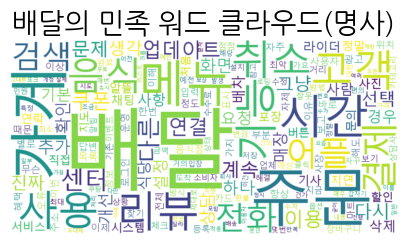

In [105]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

wc = WordCloud(
    font_path="C:\Windows\Fonts\malgun.ttf",
    background_color="white",
    width=800,
    height=400
)

wc.generate_from_frequencies(counter)

plt.figure(figsize=(5, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(명사)", fontsize=20)
plt.show()

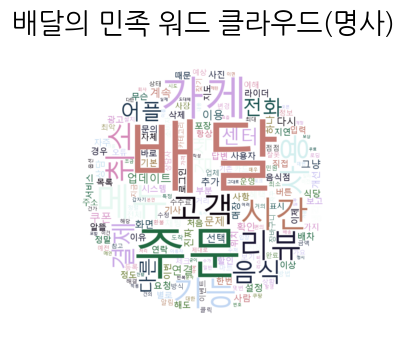

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

from PIL import Image
import numpy as np

mask_img = np.array(Image.open("resources/circle.png"))

wc = WordCloud(
    font_path="C:\Windows\Fonts\malgun.ttf",
    mask=mask_img,
    background_color="white",
    colormap="cubehelix",     # color
    width=800,
    height=400
)

wc.generate_from_frequencies(counter)

plt.figure(figsize=(5, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(명사)", fontsize=20)
plt.show()

## 4) 미션

In [ ]:
# 배달의민족 댓글 "동사"에 대한 워드 클라우드
# norm=True, stem=True 옵션 이용
# 명사에서 진행한 정규표현식, 1글자 제외 조건은 동일
# gpt 이용해서 새로운 마스크 만들어보고 적용해보기

verb_list = []

for i, review in enumerate(data["댓글"].tolist()) :
    # 조건1. 정규표현식을 이용한 전처리
    new_review = re.sub("[^0-9a-zA-Z가-힣\s]", "", review)
    # 형태소 분석기
    result = okt.pos(review, norm=True, stem=True)
    for word, pos in result:
        # 조건2 & 조건3
        if len(word) > 1 and pos == "Verb":
            verb_list.append(word)
    # 내코드
    # temp_list = []
    # for word, pos in result :
    #     if pos == "Verb":
    #         temp_list.append(word)
    # verb_list.extend(temp_list)
# print(word_list2)

['걸리다', '하다', '들어가다', '불다', '하다', '깨다', '나오다', '누르다', '않다', '건지다', '모르다', '기다리다', '먹다', '돼다', '시키다', '깔다', '하다', '하다', '시키다', '먹다', '시키다', '하다', '하다', '바뀌다', '하다', '바뀌다', '밀리다', '만들다', '놓다', '하다', '나가다', '하다', '만들다', '하다', '하다', '하다', '끄다', '바뀌다', '하다', '하다', '이뤄지다', '하다', '하다', '넘다', '남기다', '놓다', '하다', '이르다', '하다', '내다', '바라다', '줄이다', '담다', '올리다', '내리다', '움직이다', '넘어가다', '버리다', '넘어오다', '하다', '두다', '되어다', '올라가다', '되다', '벗어나다', '가다', '쓸다', '누르다', '하다', '되다', '넘다', '하다', '하다', '느끼다', '가다', '되어다', '하다', '하다', '내다', '누르다', '떼다', '하다', '되다', '되다', '넘어가다', '되어다', '하다', '하다', '바꾸다', '해주다', '열다', '되어다', '까먹다', '하다', '바꾸다', '해주다', '먹다', '받다', '보다', '먹다', '가져오다', '만들다', '되다', '되다', '하다', '보이다', '보이다', '하다', '찾다', '찾다', '나오다', '시키다', '먹다', '보다', '시키다', '먹다', '지나다', '하다', '지다', '시키다', '먹다', '보다', '지다', '자다', '하다', '가다', '하다', '하다', '하다', '꺼리다', '지다', '싸다', '오다', '비다', '차다', '해주다', '하다', '나다', '하다', '하다', '늦다', '늦다', '하다', '모르다', '하다', '잡히다', '하다', '해주다', '해주다', '하다', '적다', '들다', '들다', '되다', '되다', '

In [ ]:
counter2 = Counter(verb_list)
print(counter2)
print(counter2.most_common(30))  # 가장 많이 발생한 것 30개

Counter({'하다': 1260, '되다': 319, '시키다': 153, '않다': 144, '받다': 119, '보다': 118, '먹다': 97, '쓰다': 95, '되어다': 78, '오다': 76, '해주다': 75, '자다': 74, '모르다': 65, '뜨다': 57, '나오다': 56, '만들다': 54, '기다리다': 48, '돼다': 48, '걸리다': 46, '싶다': 44, '알다': 43, '들다': 40, '누르다': 39, '가다': 39, '바꾸다': 37, '바뀌다': 36, '찾다': 35, '쓸다': 33, '보이다': 33, '건지다': 31, '넘다': 31, '들어가다': 30, '맞다': 28, '생기다': 27, '주다': 27, '넘어가다': 25, '버리다': 25, '써다': 24, '해보다': 24, '말다': 24, '늦다': 23, '적다': 23, '두다': 21, '남기다': 19, '차다': 19, '이다': 19, '내다': 18, '이르다': 17, '끄다': 16, '나다': 16, '놓다': 15, '지다': 15, '다시다': 15, '늘어나다': 15, '치다': 15, '고치다': 15, '감사하다': 15, '보내다': 15, '올리다': 14, '잡히다': 14, '사라지다': 14, '드리다': 14, '식다': 14, '담다': 13, '지나다': 13, '갈아타다': 13, '막다': 13, '느끼다': 11, '걸다': 11, '남다': 11, '넣다': 11, '떨어지다': 11, '늘리다': 11, '늦어지다': 11, '비다': 10, '없어지다': 10, '고르다': 10, '크다': 10, '지우다': 10, '맞추다': 9, '쉬다': 9, '찾아보다': 9, '서다': 8, '만나다': 8, '없애다': 8, '깔다': 7, '바라다': 7, '내리다': 7, '싸다': 7, '짜다': 7, '켜다': 7, '적히다': 7, '잡다': 7, '살다': 7, '돌아

In [123]:
from matplotlib import font_manager

search_font = "gothic"

for font in font_manager.findSystemFonts():
    font_info = font_manager.FontProperties(fname=font)
    font_name = font_info.get_name()
    font_path = font_info.get_file()
    if search_font in font_name.lower() :
        print(font_name, font_path)

Franklin Gothic Book C:\Windows\Fonts\FRABK.TTF
Yu Gothic C:\Windows\Fonts\YuGothR.ttc
Malgun Gothic C:\Windows\Fonts\malgun.ttf
Malgun Gothic C:\Windows\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Copperplate Gothic Light C:\Windows\Fonts\COPRGTL.TTF
Franklin Gothic Heavy C:\Windows\Fonts\FRAHV.TTF
NanumGothic C:\Windows\Fonts\BOLD.TTF
Franklin Gothic Demi C:\Windows\Fonts\FRADMIT.TTF
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Copperplate Gothic Bold C:\Windows\Fonts\COPRGTB.TTF
NanumGothic C:\Windows\Fonts\EXTRABOLD.TTF
Franklin Gothic Heavy C:\Windows\Fonts\FRAHVIT.TTF
HYGothic-Medium C:\Windows\Fonts\H2GTRM.TTF
Franklin Gothic Demi Cond C:\Windows\Fonts\FRADMCN.TTF
NanumGothic C:\Windows\Fonts\.TTF
Yu Gothic C:\Windows\Fonts\YuGothB.ttc
Showcard Gothic C:\Windows\Fonts\SHOWG.TTF
Franklin Gothic Demi C:\Windows\Fonts\FRADM.TTF
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
HYGo

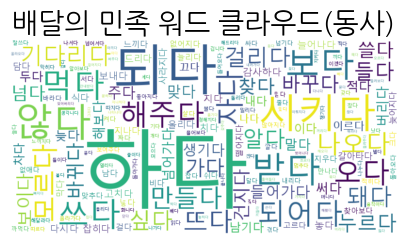

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

wc = WordCloud(
    # font_path=C":\Windows\Fonts\malgun.ttf",
    font_path="C:\Windows\Fonts\malgun.ttf",
    background_color="white",
    width=800,
    height=400
)

wc.generate_from_frequencies(counter2)

plt.figure(figsize=(5, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(동사)", fontsize=20)
plt.show()

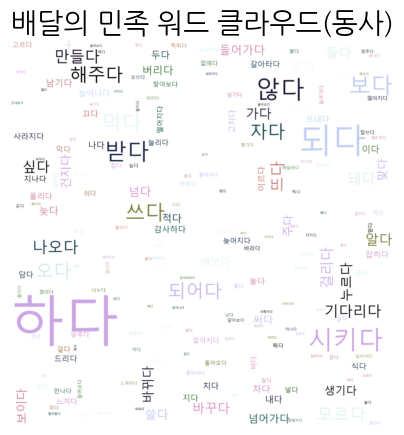

In [125]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

from PIL import Image
import numpy as np

mask_img = np.array(Image.open("resources/star.png"))

wc = WordCloud(
    font_path="C:\Windows\Fonts\malgun.ttf",
    mask=mask_img,
    background_color="white",
    colormap="cubehelix",     # color
    width=800,
    height=400
)

wc.generate_from_frequencies(counter2)

plt.figure(figsize=(5, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(동사)", fontsize=20)
plt.show()

## 5) 검색

In [134]:
# 명사들을 추출한 워드클라우드를 생성했다면, 그 명사가 포함된 문장을 어떻게 검색할 수 있을까?
# "취소" 단어가 있는 문장들만 검색
keyword = "취소"

extract_data = data.loc[data["댓글"].str.contains(keyword), :]
extract_data.head()


,댓글
0,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
14,편의점 꺼 30분을 기다렸는데 갑자기 기타 사유로 주문이 취소가 됐어요. 평소에 워...
27,응대수준 심각하네요. 문의량이 많다는 이유로 접수도 못하게하나? 예정시간에 도착을 ...
32,최악의 어플. 배민원 배달지연 너무되서 취소하려고 하는데 취소는 고객센터 연결이 필...
33,최근 배달이 안 되는 일이 발생하는게 너무 스트레스가 크네요... 배민 원에서 시키...


In [136]:
for review in extract_data["댓글"] :
    print(review)
    print("="*100)

80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못했다고만 로딩반복. 로딩 이미지는 깨져서 나오고 안정적인 네트워크 상황 하에서 새로고침을 눌러도 무한로딩이고 심지어 지금 진행중인 주문내역 정보조차 정확하지 않음. 코로나 때문에 서버가 불안정한건지 뭔지는 모르겠으나 결국엔 취소 못하고 꼼짝없이 기다려 먹게됐네요.
편의점 꺼 30분을 기다렸는데 갑자기 기타 사유로 주문이 취소가 됐어요. 평소에 워낙 친절한 매장이라 이게 무슨 일이지 하고 전화를 걸어보려 했는데 그 매장이 아니라 편의점 고객센터로 연결되네요? 심지어 주말이라 고객센터는 받지도 않고..ㅠㅠㅠ 계속 기다렸는데.. 곧 나가야 해서 이제 와서 다른 걸 시킬 수도 없고요 바쁠 수도 있고 재고가 없을 수도 있는 거 다 이해하고 평소에 친절하게 대응했던 매장이라 엄청 화는 안 나요 다만 오래 기다렸으니까 취소할 때는 왜 안되는지 정확한 사유를 말해주셨으면 좋겠어요 그리고 편의점에서 부족한 게 있을 때 부분 취소는 안되는 걸까요? 안된다면 이런 점도 개선됐으면 좋겠어요 그래야 서로 편할거같아요
응대수준 심각하네요. 문의량이 많다는 이유로 접수도 못하게하나? 예정시간에 도착을 안하면 적어도 취소라도 하게 해야죠. 전화도 안되고 채팅도 안되면 이런 문제상황이 발생했을때 어떻게 대처하려고 그러시나 배민 수준 점점 떨어지는게 보이네요. 앞으로는 이용 안할 생각입니다
최악의 어플. 배민원 배달지연 너무되서 취소하려고 하는데 취소는 고객센터 연결이 필요. 고객센터 연결 절대안되고 그냥 고객은 환불도 못받고 무작정 기다려야 함. 주문한 가게에서는 환불하려면 고객이 직접 고객센터 연결해야한다고만 하고.. 그래서 배달시켰는데 제가 포장하는것마냥 직접 걸어갔다왔습니다^^ 할인쿠폰 준다고 절대 사용하지 마세요^^
최근 배달이 안 되는 일이 발생하는게 너무 스트레스가 크네요... 배민 원에서 시키고 알뜰 배달로도 시켜봐도 이런 일이 가끔 발생하는거 보면 특정 시스템이 아니라 배민 자체의 문제 같은데 

## + Kiwi 형태소 분석기 체험

```
uv add kiwipiepy
```

In [ ]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
for res, score in kiwi.analyze(text, top_n=5):
    print(score, result, sep="\t")

# konlpy 보다 기능이 훨씬 많음

-65.28563690185547	[('메뉴', 'Noun'), ('잘', 'VerbPrefix'), ('못', 'VerbPrefix'), ('오다', 'Verb'), ('문의', 'Noun'), ('하다', 'Verb'), ('채팅', 'Noun'), ('답변', 'Noun'), ('하다', 'Verb'), ('20분', 'Number'), ('걸리다', 'Verb'), ('메뉴', 'Noun'), ('다시', 'Noun'), ('받다', 'Verb'), ('1시간', 'Number'), ('걸리다', 'Verb'), ('이', 'Determiner'), ('거', 'Noun'), ('리뷰', 'Noun'), ('쓰다', 'Verb'), ('어플', 'Noun'), ('삭제', 'Noun')]
-69.0050277709961	[('메뉴', 'Noun'), ('잘', 'VerbPrefix'), ('못', 'VerbPrefix'), ('오다', 'Verb'), ('문의', 'Noun'), ('하다', 'Verb'), ('채팅', 'Noun'), ('답변', 'Noun'), ('하다', 'Verb'), ('20분', 'Number'), ('걸리다', 'Verb'), ('메뉴', 'Noun'), ('다시', 'Noun'), ('받다', 'Verb'), ('1시간', 'Number'), ('걸리다', 'Verb'), ('이', 'Determiner'), ('거', 'Noun'), ('리뷰', 'Noun'), ('쓰다', 'Verb'), ('어플', 'Noun'), ('삭제', 'Noun')]
-69.7073745727539	[('메뉴', 'Noun'), ('잘', 'VerbPrefix'), ('못', 'VerbPrefix'), ('오다', 'Verb'), ('문의', 'Noun'), ('하다', 'Verb'), ('채팅', 'Noun'), ('답변', 'Noun'), ('하다', 'Verb'), ('20분', 'Number'), ('걸리다', 'Verb'), ('메뉴

In [140]:
text = "분명 배달이 완료되었는데 나는 받지 않았어"

kiwi = Kiwi()
result = kiwi.tokenize(text)
print(result)   # result 유형 : list

[Token(form='분명', tag='MAG', start=0, len=2), Token(form='배달', tag='NNG', start=3, len=2), Token(form='이', tag='JKS', start=5, len=1), Token(form='완료', tag='NNG', start=7, len=2), Token(form='되', tag='XSV', start=9, len=1), Token(form='었', tag='EP', start=10, len=1), Token(form='는데', tag='EC', start=11, len=2), Token(form='나', tag='NP', start=14, len=1), Token(form='는', tag='JX', start=15, len=1), Token(form='받', tag='VV-R', start=17, len=1), Token(form='지', tag='EC', start=18, len=1), Token(form='않', tag='VX', start=20, len=1), Token(form='었', tag='EP', start=21, len=1), Token(form='어', tag='EF', start=22, len=1)]


In [142]:
for res in result :
    print(res.form, res.tag)

분명 MAG
배달 NNG
이 JKS
완료 NNG
되 XSV
었 EP
는데 EC
나 NP
는 JX
받 VV-R
지 EC
않 VX
었 EP
어 EF


In [143]:
# 명사만 추출
for res in result :
    if res.tag[0] == "N" :
        print(res.form, res.tag)

배달 NNG
완료 NNG
나 NP


# 2. 장바구니 분석

In [145]:
data = pd.read_csv("data/배달의민족댓글2.csv", index_col=0)
data.head()

,댓글
0,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
1,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
2,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
3,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는..."
4,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...


In [150]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
# 빈 리스트 만들기 main_list
# 댓글을 반복문으로 하나씩 추출
# 전처리 과정 그대로
# 댓글 형태소 분석
# 빈 리스트 만들기 sub_list
# 반복문으로 형태소 명사 단어들 담기
# sub_list에 명사 단어들 담기
# main_list에 sub_list 담기

main_list = []

for i, review in enumerate(data["댓글"].tolist()) :
    # print(f"{i}번째 리뷰 : {review}")
    # 조건1. 정규표현식을 이용한 전처리 
    new_review = re.sub("[^0-9a-zA-Z가-힣\s]", "", review)
    # 형태소 분석기에 넣기 (-> kiwi 사용 혼자해보자)
    result = okt.pos(new_review)
    sub_list =[]
    for word, pos in result :
        if pos == "Noun" and len(word) > 1:
            sub_list.append(word)
    main_list.append(sub_list)

    print(f"{i}번째 리뷰 : {result}")

0번째 리뷰 : [('80분', 'Number'), ('걸린다길래', 'Verb'), ('주문', 'Noun'), ('취소', 'Noun'), ('하려고', 'Verb'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('에', 'Josa'), ('들어가면', 'Verb'), ('계속', 'Noun'), ('최신', 'Noun'), ('정보', 'Noun'), ('를', 'Josa'), ('불러오지', 'Verb'), ('못', 'VerbPrefix'), ('했다고만', 'Verb'), ('로딩', 'Noun'), ('반복', 'Noun'), ('로딩', 'Noun'), ('이미지', 'Noun'), ('는', 'Josa'), ('깨져서', 'Verb'), ('나오고', 'Verb'), ('안정', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('네트워크', 'Noun'), ('상황', 'Noun'), ('하', 'Noun'), ('에서', 'Josa'), ('새로고침', 'Noun'), ('을', 'Josa'), ('눌러도', 'Verb'), ('무한', 'Noun'), ('로딩', 'Noun'), ('이고', 'Josa'), ('심지어', 'Noun'), ('지금', 'Noun'), ('진행중', 'Noun'), ('인', 'Josa'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('정보', 'Noun'), ('조차', 'Josa'), ('정확하지', 'Adjective'), ('않음', 'Verb'), ('코로나', 'Noun'), ('때문', 'Noun'), ('에', 'Josa'), ('서버', 'Noun'), ('가', 'Josa'), ('불안정한', 'Adjective'), ('건지', 'Verb'), ('뭔', 'Noun'), ('지는', 'Josa

In [153]:
for temp in main_list :
    print(temp)

['주문', '취소', '계속', '최신', '정보', '로딩', '반복', '로딩', '이미지', '안정', '네트워크', '상황', '새로고침', '무한', '로딩', '심지어', '지금', '진행중', '정보', '코로나', '때문', '서버', '취소', '꼼짝']
['음식', '하나', '우리나라', '국내', '번호', '번호', '인증', '필수', '카드', '결제', '선택', '다른', '은행', '인증', '정도', '해외', '카드', '결제', '수단', '아예', '현금', '결제', '옵션', '음식', '하나', '나라', '우리나라', '강국', '무슨', '핸드폰', '번호', '인증', '카드', '인증', '스탭', '사용', '저녁', '먹음', '외국', '거주', '방법', '해외', '카드', '결제']
['업데이트', '사용', '점점', '클릭', '한번', '결제', '저쪽', '구석', '마치', '배달', '유도', '메인', '잘못', '클릭', '자꾸', '결제', '다시', '클릭', '결제', '요청', '사항', '리뷰', '이벤트', '클릭', '정말', '배민']
['배달', '민족', '자체', '식사', '리뷰', '평점', '자체', '클린', '식당', '입장', '업주', '입장', '문건', '주문', '입장', '식당', '체적', '맛집', '탐색', '자체', '대한', '평점', '식사', '항상', '추구', '평점', '생각', '수고', '어플리케이션', '개발자', '여러분', '아이디어', '방법', '안해']
['장바구니', '마트', '여러가지', '크롤', '살짝', '대각선', '배달', '포장', '용량', '좌우', '마트', '항목', '다시', '체크', '상태', '로딩', '위로', '전체', '선택', '살짝', '직선', '항목', '배달', '포장', '마트', '용량', '항목', '선택', '화면', '필요', '거의', '매일', '배민', 

In [152]:
main_list[0]

['주문',
 '취소',
 '계속',
 '최신',
 '정보',
 '로딩',
 '반복',
 '로딩',
 '이미지',
 '안정',
 '네트워크',
 '상황',
 '새로고침',
 '무한',
 '로딩',
 '심지어',
 '지금',
 '진행중',
 '정보',
 '코로나',
 '때문',
 '서버',
 '취소',
 '꼼짝']

In [154]:
#  main_list = [[리뷰1에 대한 명사 단어들], [리뷰2에 대한 명사 단어들], ...] 형식으로 저장되어야 한다

```
uv add mlxtend
```

In [155]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_arr = te.fit(main_list).transform(main_list)
df = pd.DataFrame(te_arr, columns=te.columns_)

df

,가게,가격,가계,가계도,가계부,가기,가까이,가끔,가능,가도,...,횡포,효율,후기,후식,훌쩍,휴가,휴대폰,휴무,휴일,희망
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [158]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
print(frequent_itemsets)

    support itemsets
0  0.247826     (가게)
1  0.576087     (배달)
2  0.252174     (배민)
3  0.317391     (주문)


In [159]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print(rules)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


## + 간단 예제로 보기

In [160]:
main_list = [
    ["밥", "국", "김치"],
    ["밥", "국"],
    ["밥", "김치"],
    ["라면", "김치"],
    ["밥", "반찬"],
    ["국", "김치"]
]

In [162]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_arr = te.fit(main_list).transform(main_list)
df = pd.DataFrame(te_arr, columns=te.columns_)

df

,국,김치,라면,반찬,밥
0,True,True,False,False,True
1,True,False,False,False,True
2,False,True,False,False,True
3,False,True,True,False,False
4,False,False,False,True,True
5,True,True,False,False,False


In [163]:
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.500000,(국)
1,0.666667,(김치)
2,0.666667,(밥)
3,0.333333,"(국, 김치)"
4,0.333333,"(밥, 국)"
5,0.333333,"(밥, 김치)"


In [164]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(국),(김치),0.500000,0.666667,0.333333,0.666667,1.0,1.0,0.0,1.0,0.0,0.4,0.0,0.583333
1,(김치),(국),0.666667,0.500000,0.333333,0.500000,1.0,1.0,0.0,1.0,0.0,0.4,0.0,0.583333
2,(밥),(국),0.666667,0.500000,0.333333,0.500000,1.0,1.0,0.0,1.0,0.0,0.4,0.0,0.583333
3,(국),(밥),0.500000,0.666667,0.333333,0.666667,1.0,1.0,0.0,1.0,0.0,0.4,0.0,0.583333


인코딩 : 텍스트에 숫자 부여 (숫자 의미 X)
벡터라이징 : 텍스트를 벡터화(숫자 카운트)
임베딩 : 딥러닝 (학습된 모델)